# Google Play Store Data EDA

## The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

C:\Users\manni\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Dataset Loading

In [2]:
# Load Dataset
play_df=pd.read_csv(r'Play Store Data.csv')

### Dataset First View

In [3]:
# Dataset First Look
play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
play_df.shape

(10841, 13)

### Dataset Information

In [5]:
# Dataset Info
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
play_df.duplicated().sum()

483

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
play_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

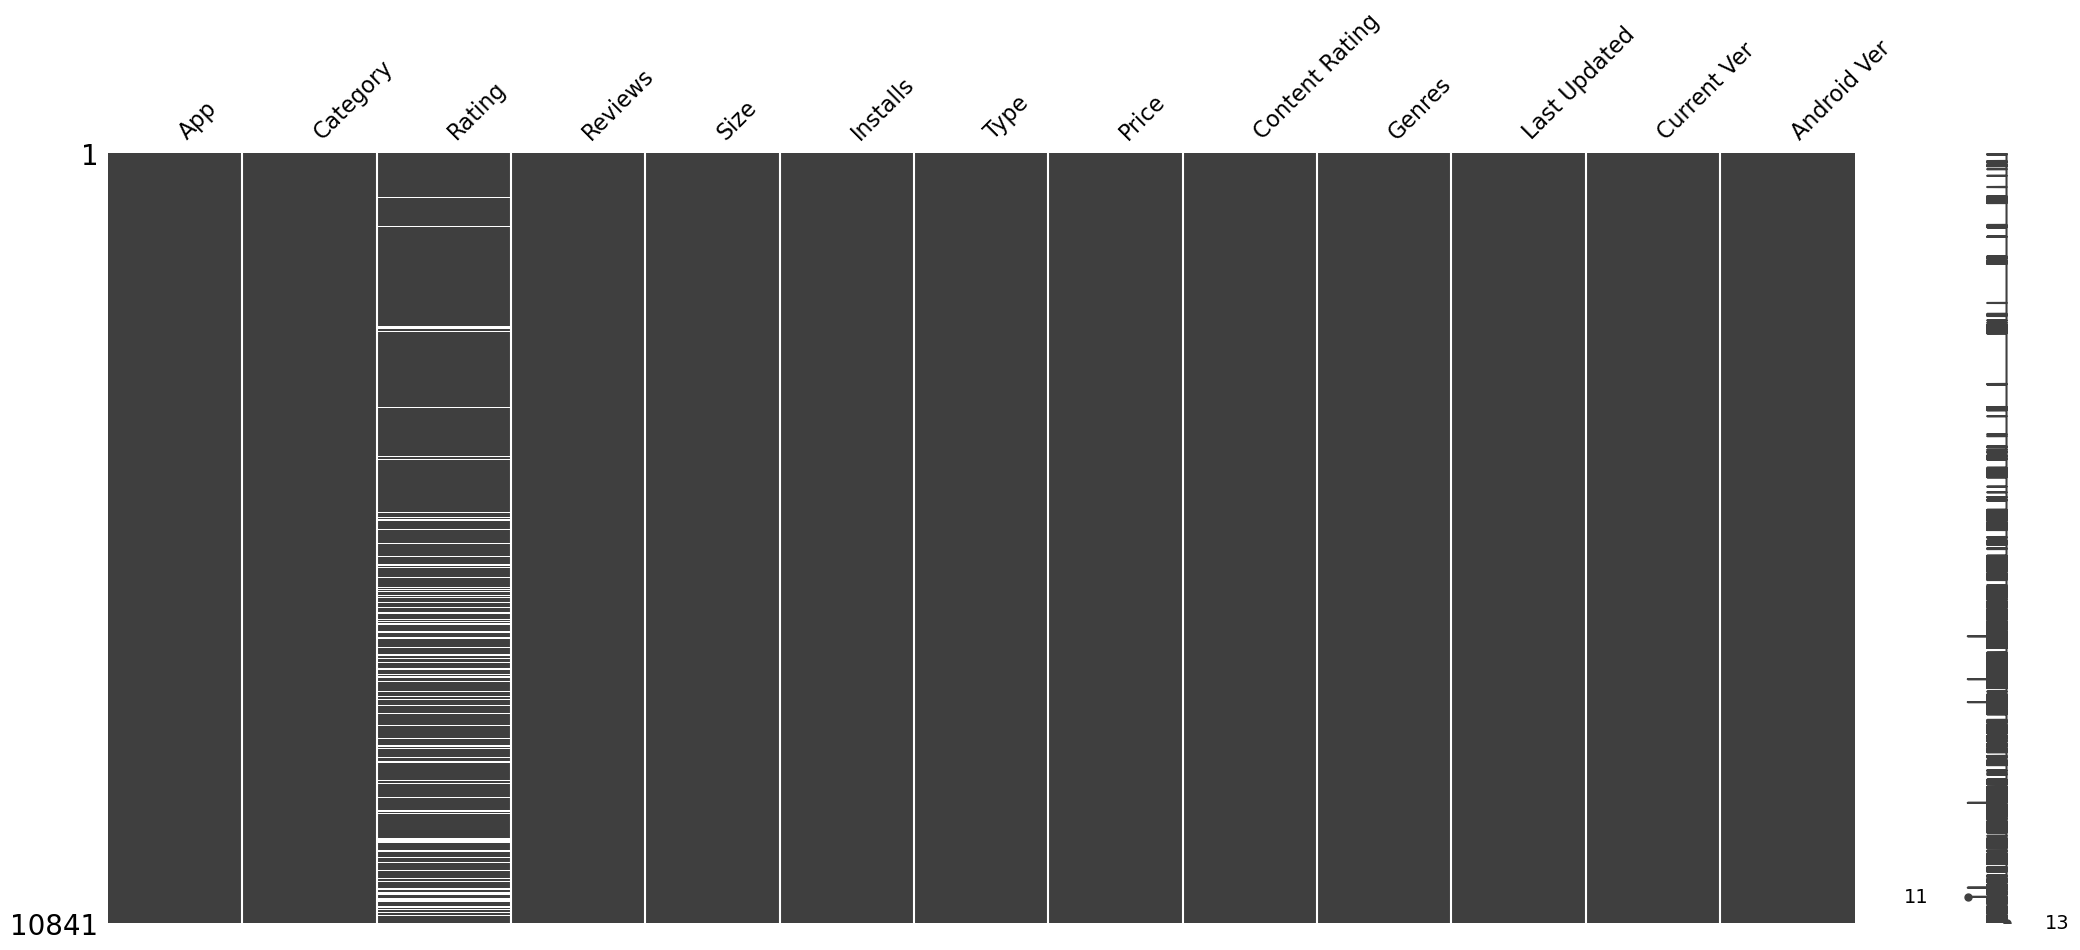

In [8]:
# Visualizing the missing values
mn.matrix(play_df)
plt.show()

### What did you know about your dataset?

Answer Here: There are about 10841 rows and 13 columns, in which there are 483 duplicate rows and also the data contains null values.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
# Dataset Describe
play_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Variables Description

. There are a total of 10841 rows and 13 columns.
. Ratings has more missing values (1474)
. Only Rating is the numerical column rest are object dtype.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in list(play_df.columns):
    print(play_df[i].value_counts())
    print('----------------------------------')


App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9660, dtype: int64
----------------------------------
Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE         

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
#lets go in order first start with category
play_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [13]:
play_df[play_df['Category']=='1.9']   #as we can see the current value of each column is not correct everything has shifted towards right

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
x=play_df[play_df['Category']=='1.9']
y=x.iloc[:,0:]
y.iloc[:,1]=np.nan
y.iloc[:,2:]=x.iloc[:,1:]
play_df.iloc[10472:10473,:]=y


C:\Users\manni\AppData\Local\Temp\ipykernel_12596\3267822372.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10472    1.9
Name: Category, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y.iloc[:,2:]=x.iloc[:,1:]
C:\Users\manni\AppData\Local\Temp\ipykernel_12596\3267822372.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1.9']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  play_df.iloc[10472:10473,:]=y


In [15]:
play_df.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [16]:
#Converting ratings and reviews to numerical
play_df['Rating'] = play_df['Rating'].astype('float64')
play_df['Reviews'] = play_df['Reviews'].astype('float64')

In [17]:
def size_scale(size):
    if size[-1]=='M':
        return float(size.replace('M',''))
    if size[-1]=='K':
        return float(size.replace('K',''))/1024.0
    return np.nan

In [18]:
play_df['Size']=play_df['Size'].apply(size_scale)

In [19]:
play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [20]:
#now for installs
def proper_installs(installs):
    if ('+' in installs ) or (',' in installs):
        return int(installs.replace('+','').replace(',',''))
    return np.nan

In [21]:
play_df['Installs']=play_df['Installs'].apply(proper_installs)

In [22]:
play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,1000.0,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [23]:
#for price
def proper_price(price):
    if ('$' in price) or price=='0':
        return float(price.replace('$',''))
    else:
        return np.nan

In [24]:
play_df['Price']=play_df['Price'].apply(proper_price)

In [25]:
play_df['Price'].value_counts()

Price
0.00     10041
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: count, Length: 92, dtype: int64

In [26]:
#Last updated we need to change to date format
play_df['Last Updated'] = pd.to_datetime(play_df['Last Updated'])

In [27]:
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  float64       
 4   Size            8830 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


In [28]:
def proper_version(version):
    if str(version)[0].isnumeric():
        return version
    return np.nan

In [29]:
#for android versions:
play_df['Current Ver']=play_df['Current Ver'].apply(proper_version)
play_df['Android Ver']=play_df['Android Ver'].apply(proper_version)

In [30]:
play_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,NaN,NaN


### What all manipulations have you done and insights you found?

Have cleaned the data and have put proper data types for each column, which ever is an error replaced it with nan.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

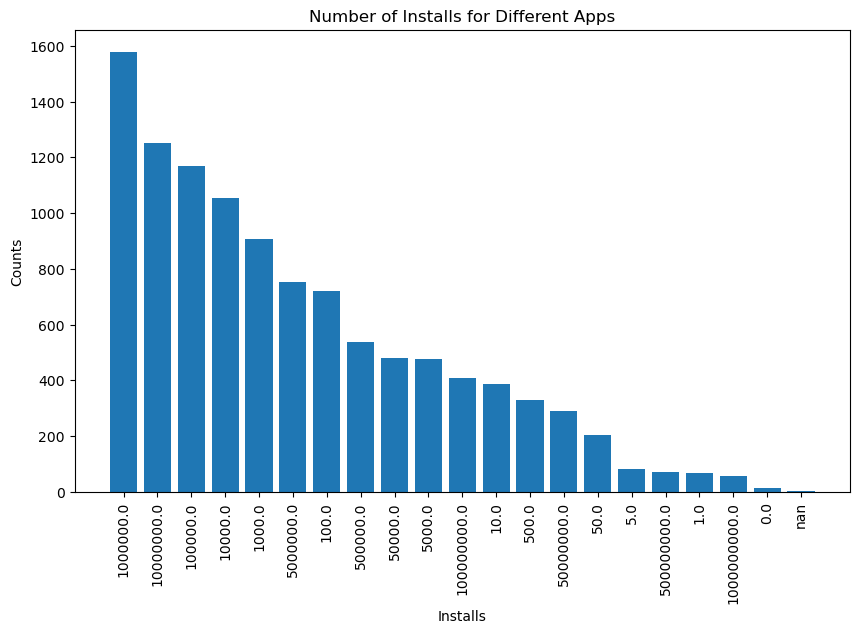

In [31]:
# Chart - 1 visualization code
x=pd.DataFrame(play_df['Installs'].astype('str').value_counts()).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(x['Installs'],x['count'])
plt.xlabel('Installs')
plt.ylabel('Counts')
plt.title('Number of Installs for Different Apps')

# Rotate the x labels
plt.xticks(rotation=90)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

To Understand Installs

##### 2. What is/are the insight(s) found from the chart?

Users are high,most number of app have 1L+ installs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1L+ apps have the potential to convert into higher numbers.

#### Chart - 2

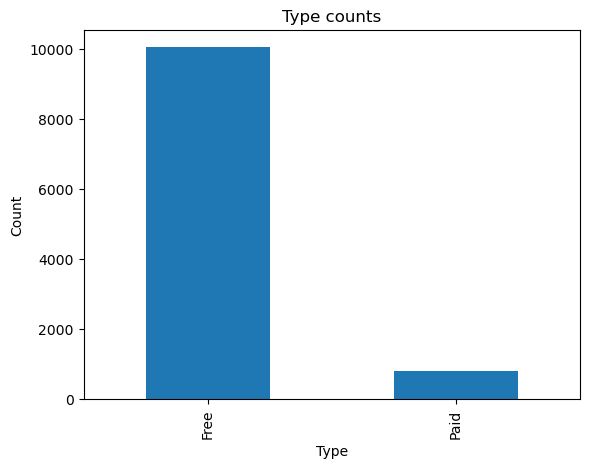

In [32]:
# Chart - 2 visualization code
play_df["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Type counts")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To understands what is the ratio of free and paid apps.

##### 2. What is/are the insight(s) found from the chart?

Free apps are huge then compared to paid.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In order to make money for play store the paid apps should increase.

#### Chart - 3

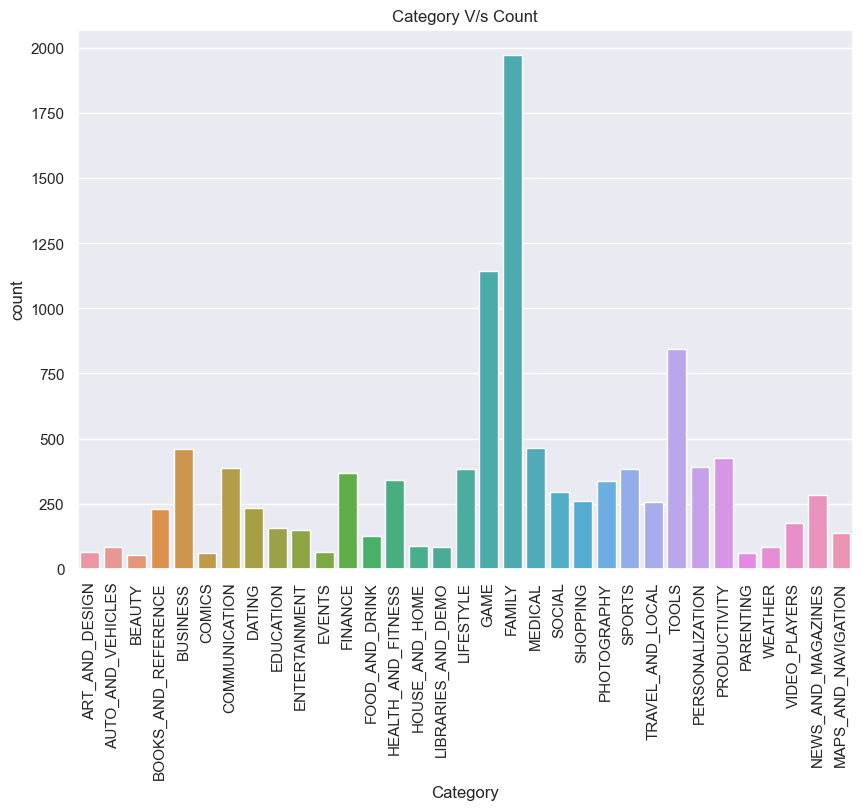

In [46]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Category V/s Count")
ax = sns.countplot(x="Category", data=play_df)

##### 1. Why did you pick the specific chart?

To understand counts of each category

##### 2. What is/are the insight(s) found from the chart?

Family has the higheest number of apps

#### Chart - 4

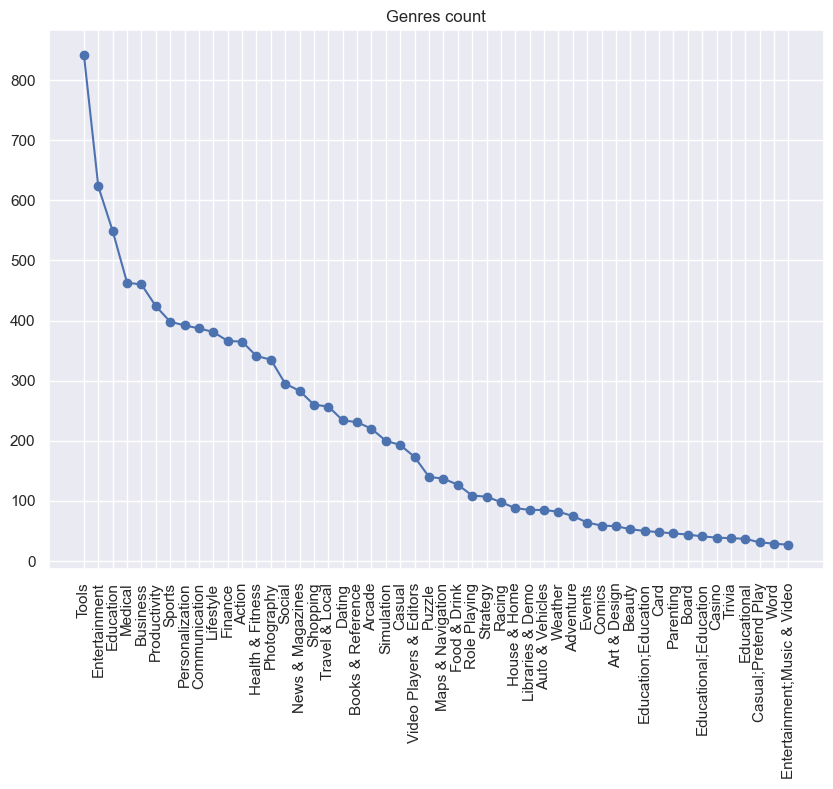

In [47]:
# Chart - 4 visualization code
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Genres count")
gen=pd.DataFrame(play_df['Genres'].value_counts()[:50]).reset_index()
ax = plt.plot(gen["Genres"],gen["count"],marker="o")

##### 1. Why did you pick the specific chart?

To understand the genres count.

##### 2. What is/are the insight(s) found from the chart?


Tools have the highest number of apps.

#### Chart - 5

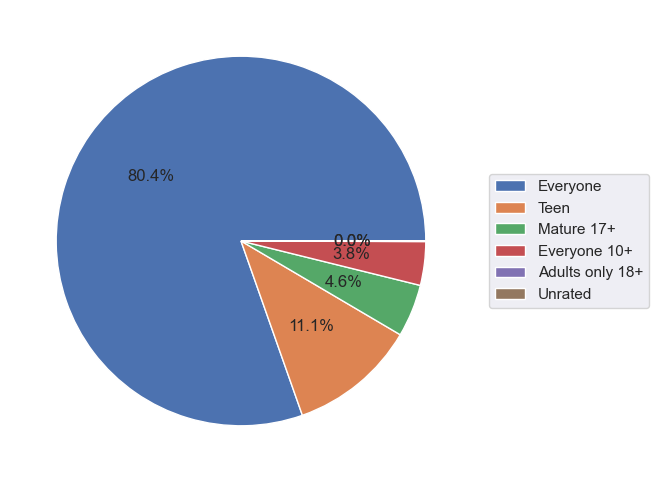

In [35]:
# Chart - 5 visualization code
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
number_of_apps = play_df["Content Rating"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))

##### 1. Why did you pick the specific chart?

To understand the distribution of content rating.

##### 2. What is/are the insight(s) found from the chart?

Everyone has the highest content rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 1.0, 'Content rating with their counts')

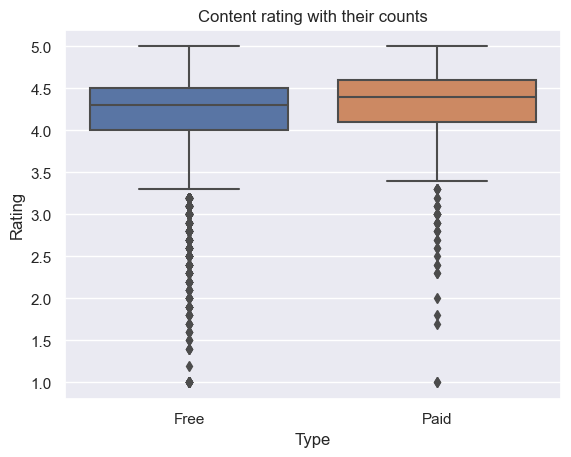

In [36]:
# Chart - 6 visualization code
sns.boxplot(x = "Type", y = "Rating", data = play_df)
plt.title("Content rating with their counts")

##### 1. Why did you pick the specific chart?

To understand the outliers and median rating of Type column

##### 2. What is/are the insight(s) found from the chart?

Paid apps have the high median

#### Chart - 7

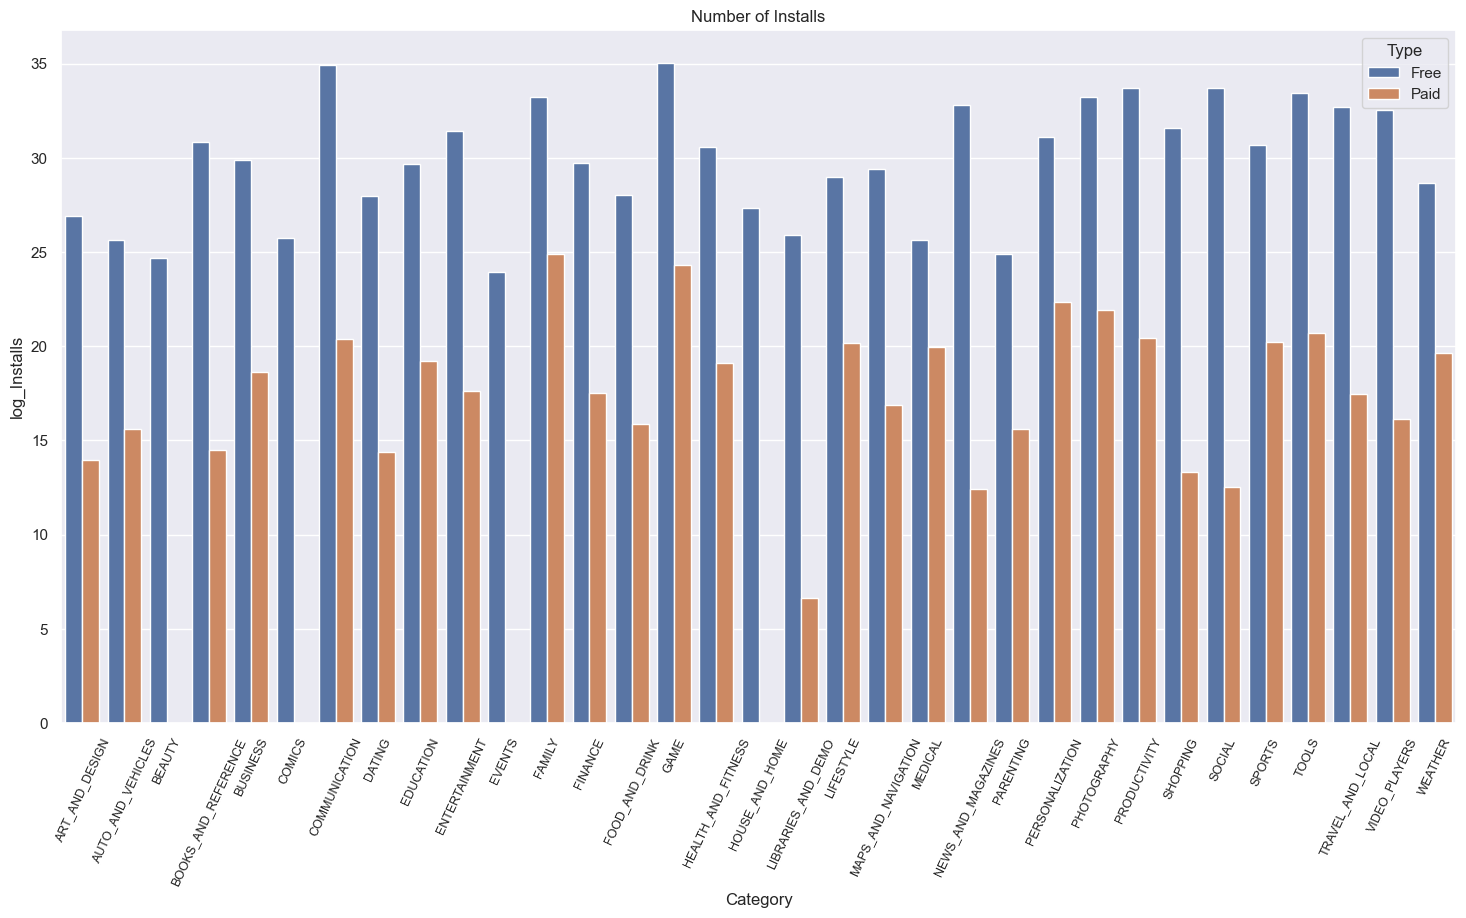

In [58]:
# Chart - 7 visualization code
category_type_installs = play_df.groupby(['Category', 'Type'])[['Installs']].sum().reset_index()
category_type_installs['log_Installs'] = np.log2(category_type_installs['Installs'])
plt.figure(figsize=(18, 9))
plt.xticks(rotation=65, fontsize=9)
plt.title("Number of Installs")
sns.barplot(x='Category', y='log_Installs', hue='Type', data=category_type_installs)

plt.show()

#### Chart - 8

C:\Users\manni\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


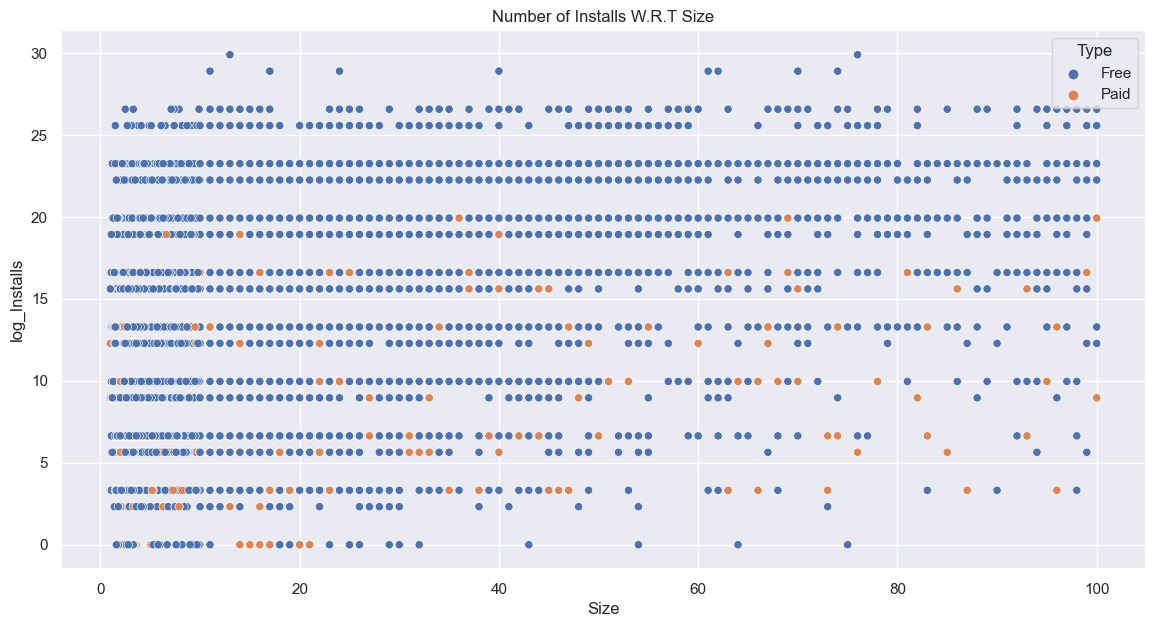

In [59]:
play_df['log_Installs'] = np.log2(play_df['Installs'])
plt.figure(figsize=(14, 7))
plt.title("Number of Installs W.R.T Size")
sns.scatterplot(x='Size', y='log_Installs', hue='Type', data=play_df)
plt.show()

#### Chart - 14 - Correlation Heatmap

Text(0.5, 1.0, 'Heatmap for numerical columns')

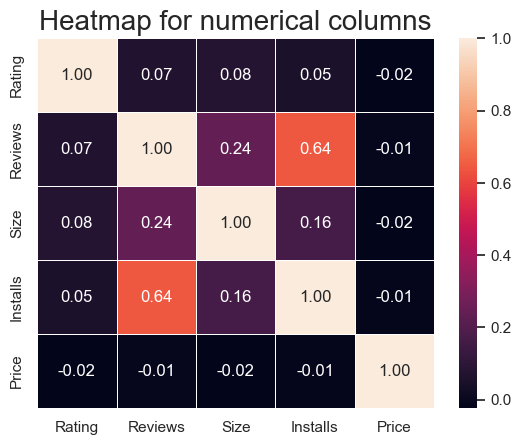

In [60]:
# Correlation Heatmap visualization code
cor=play_df[['Rating','Reviews','Size','Installs','Price']]
sns.heatmap(cor.corr(), annot = True, linewidths=.5, fmt=".2f")
plt.title("Heatmap for numerical columns", size=20)

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
1) Focus on Popular Categories:

-Games and Communication Apps: Invest in high-quality games and communication apps due to their high installation rates.

-Tools and Utilities: Develop useful utility apps to attract more users.

2) Freemium Model:

-Free with In-App Purchases: Offer free apps with premium features or in-app purchases.

-Advertising Revenue: Use ads in free apps to generate revenue.

3) Optimize App Size:

-Efficiency in Design: Ensure the app is lightweight to encourage more downloads.

-Incremental Updates: Provide small, frequent updates to manage app size.

4) Category-Specific Strategies:

-Family and Educational Apps: Improve quality and marketing to boost visibility and downloads.

-Medical and Health Apps: Highlight unique features to justify the cost of paid apps.

5) User Feedback and Reviews:

-Engage with Users: Update apps based on feedback to improve satisfaction.

-Ratings and Reviews: Encourage positive reviews to enhance visibility.

# **Conclusion**

The analysis shows that Games and Communication apps are the most installed, and free apps are more popular than paid ones. App size significantly impacts installations, with smaller apps being preferred. To achieve business goals, focus on high-demand categories, adopt a freemium model, and optimize app size to enhance user experience and increase market penetration.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***